# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
import warnings
warnings.filterwarnings(action='ignore')


In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

In [161]:
file_list = os.listdir()
print(file_list)

['2023-1.parquet', '2023-10.parquet', '2023-11.parquet', '2023-12.parquet', '2023-2.parquet', '2023-3.parquet', '2023-4.parquet', '2023-5.parquet', '2023-6.parquet', '2023-7.parquet', '2023-8.parquet', '2023-9.parquet', 'sampled_file']


In [162]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Create a list of all the twelve files to read

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        tempdf = pd.read_parquet(file_path)
        print(file_path)

        tempdf['pickup_days'] = tempdf['tpep_pickup_datetime'].dt.day

        tempdf['pickup_hours'] = tempdf['tpep_pickup_datetime'].dt.hour

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe
        for d in tempdf['pickup_days'].unique():
            for h in tempdf['pickup_hours'].unique():
                hour_data = tempdf[(tempdf['pickup_days']==d) & (tempdf['pickup_hours']==h)]
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

E:\MS_AI&ML\C1_SQL_&_Stats_essentials\m7_assignment1_nycTaxi\4f60c268-2557-4bf6-82a3-5425c58d56ce-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\trip_records\2023-1.parquet
E:\MS_AI&ML\C1_SQL_&_Stats_essentials\m7_assignment1_nycTaxi\4f60c268-2557-4bf6-82a3-5425c58d56ce-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\trip_records\2023-10.parquet
E:\MS_AI&ML\C1_SQL_&_Stats_essentials\m7_assignment1_nycTaxi\4f60c268-2557-4bf6-82a3-5425c58d56ce-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\trip_records\2023-11.parquet
E:\MS_AI&ML\C1_SQL_&_Stats_essentials\m7_assignment1_nycTaxi\4f60c268-2557-4bf6-82a3-5425c58d56ce-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\trip_records\2023-12.parquet
E:\MS_AI&ML\C1_SQL_&_Stats_essentials\m7_assignment1_nycTaxi\4f60c268-2557-4bf6-82a3-5425c58d56ce-Starter-Notebook-EDA-NYC-Taxi\Starter Notebook - EDA NYC Taxi\trip_records\2023-2.parquet
E:\MS_AI&ML\C1_SQL_&_Stats_essentials\m7_assignment1_nycT

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('sampled_file')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [1]:
import os
os.chdir('trip_records')

In [5]:
# Load the new data file
df = pd.read_parquet('sampled_file')

In [164]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3703               41             1  ...      0.5        4.12           0.0   
4166              137             1  ...      0.5        3.56           0.0   
3847              141             1  ...      0.5        3.98           0.0   
1882              107             2  ...      0.5        0.00           0.0   
2995366            17             0  ...      0.5        8.17           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3703                       1.0         24.72                   2.5   
4166                       1.0         21.36                   2.5   
3847                       1.0         23.88                   2.5   
1882                       1.0         29.70                   2.5   
2995366                    1.0         49.00                   NaN   

         airport_fee  pickup_days  pickup_hours  Airport_fee  
3703             0.0            1             0          NaN  
4166             0.0            1             0          NaN  
3847             0.0            1             0          NaN  
1882             0.0            1             0          NaN  
2995366          NaN            1             0          NaN  

[5 rows x 22 columns]

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 3703 to 2698522
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True,inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns
df.airport_fee = df.apply(lambda x: np.nan if (np.isnan(x['airport_fee']) & np.isnan(x['Airport_fee'])) else x['airport_fee'] if np.isnan(x['Airport_fee']) else x['Airport_fee'], axis=1)
df = df.drop('Airport_fee',axis=1)


KeyError: 'Airport_fee'

In [ ]:
df.info()

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
nve_values = df[(df['fare_amount']<0) | (df['extra']<0) | (df['mta_tax']<0) | (df['tolls_amount']<0) | (df['improvement_surcharge']<0) | (df['total_amount']<0) | (df['congestion_surcharge']<0) | (df['airport_fee']<0)]
nve_values.head()
#plt.boxplot(nve_values.fare_amount)
df[(df['fare_amount']<0)]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
df[(df['fare_amount']<0)]
#there is no record with negative fare_amount

In [ ]:
# fix these negative values
# fixing the negative records in the following cells


In [ ]:
# Find which columns have negative values
#removing values based on total_amount as total amount cannot be negative
df = df[(df['total_amount']>=0)]


In [ ]:
# checking records with negative monetory values after removing -ve total_amount
nve = df[(df['fare_amount']<0) | (df['extra']<0) | (df['mta_tax']<0) | (df['tolls_amount']<0) | (df['improvement_surcharge']<0) | (df['total_amount']<0) | (df['congestion_surcharge']<0) | (df['airport_fee']<0)]['RatecodeID']
nve.info()

In [ ]:
#only one records is left with negative monetory value
# checking the record
df[(df['fare_amount']<0) | (df['extra']<0) | (df['mta_tax']<0) | (df['tolls_amount']<0) | (df['improvement_surcharge']<0) | (df['total_amount']<0) | (df['congestion_surcharge']<0) | (df['airport_fee']<0)]

In [ ]:
# from above record it is obvious that extra is negative
# we can remove this record
df = df[(df['extra']>=0)]

In [ ]:
#after removing we can find that there is no record left with negative values
df[(df['fare_amount']<0) | (df['extra']<0) | (df['mta_tax']<0) | (df['tolls_amount']<0) | (df['improvement_surcharge']<0) | (df['total_amount']<0) | (df['congestion_surcharge']<0) | (df['airport_fee']<0)]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
#df.plot(kind="bar", stacked="True")
for i in list(df.columns.values):
    count = df[i].isnull().sum()
    print("Number of missing/null values values for column>>",i,"are>>",count)

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(),inplace=True)

In [ ]:
df['passenger_count'].isnull().sum()

Did you find zeroes in passenger_count? Handle these.

In [ ]:
df['passenger_count'].replace(0,df['passenger_count'].median(),inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [10]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].median(),inplace=True)

In [11]:
#checking values other than 1,2,3,4,5,6 in RatecodeID
df['RatecodeID'].value_counts()

RatecodeID
1.0     1794222
2.0       71584
99.0      10477
5.0       10293
3.0        6123
4.0        3718
6.0           3
Name: count, dtype: int64

In [12]:
#replacing value 99 in RatecodeID with median value
df['RatecodeID'].replace(99.0,df['RatecodeID'].median(),inplace=True)

In [13]:
#checking values other than 1,2,3,4,5,6 in RatecodeID
df['RatecodeID'].value_counts()

RatecodeID
1.0    1804699
2.0      71584
5.0      10293
3.0       6123
4.0       3718
6.0          3
Name: count, dtype: int64

In [14]:
#now we only have valid values for RatecodeID

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [15]:
# handle null values in congestion_surcharge
# replacing null values of congestioon surcharge with 0
df['congestion_surcharge'].fillna(0,inplace=True)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [16]:
# Handle any remaining missing values
df['store_and_fwd_flag'].fillna('N',inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [17]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



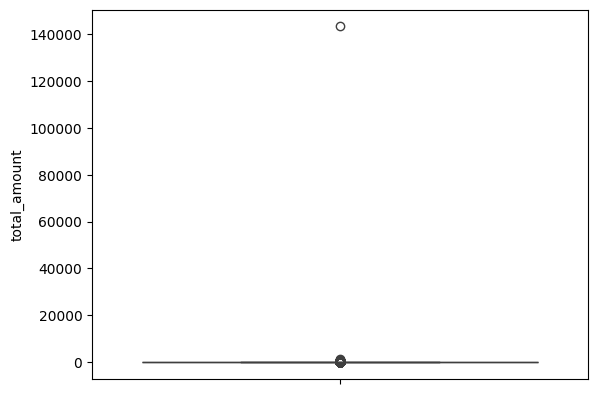

In [18]:
# total_amount
sns.boxplot(df.total_amount)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [19]:
# remove passenger_count > 6
df = df[df.passenger_count<7]

In [20]:
# Continue with outlier handling
df = df[df.total_amount<10000]


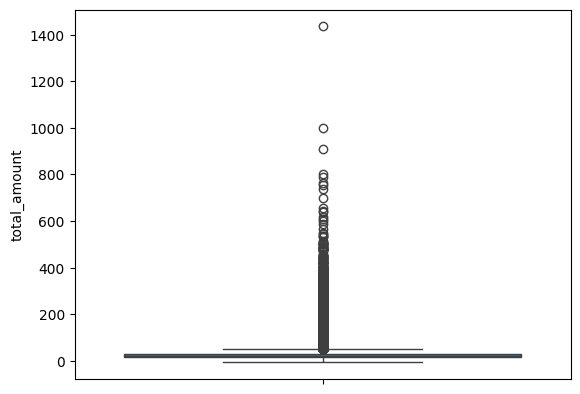

In [21]:
sns.boxplot(df.total_amount)
plt.show()

In [22]:
df = df[df.total_amount<400]

In [23]:
# Do any columns need standardising?
df['passenger_count'] = df['passenger_count'].apply(np.int32)
df['RatecodeID'] = df['RatecodeID'].apply(np.int32)

In [24]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df.drop(df[(df.trip_distance<5) & (df.total_amount>300)].index,inplace=True)

In [25]:
# removing records having trip_distance 0 and different pickup and drop off location
df.drop(df[(df.trip_distance==0) & (df.PULocationID!=df.DOLocationID)].index,inplace=True)

In [26]:
# trip distance > 250
df.drop(df[df.trip_distance>250].index,inplace=True)

In [27]:
# removing payment type other than 1,2,3,4,5,6 
df = df[df.payment_type.isin([1,2,3,4,5,6])]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [28]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_days',
 'pickup_hours']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='pickup_hours', ylabel='Count'>

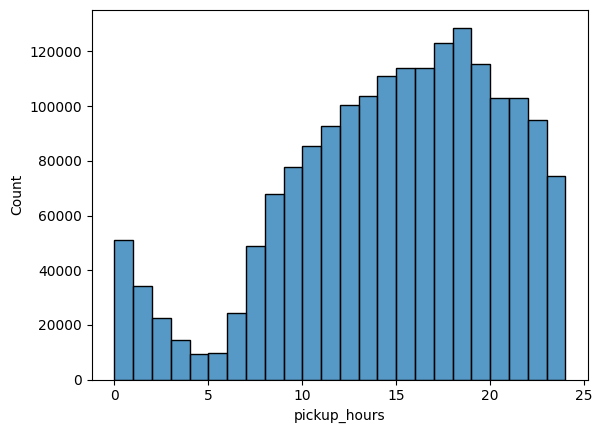

In [108]:
# Find and show the hourly trends in taxi pickups
sns.histplot(df['pickup_hours'],bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])


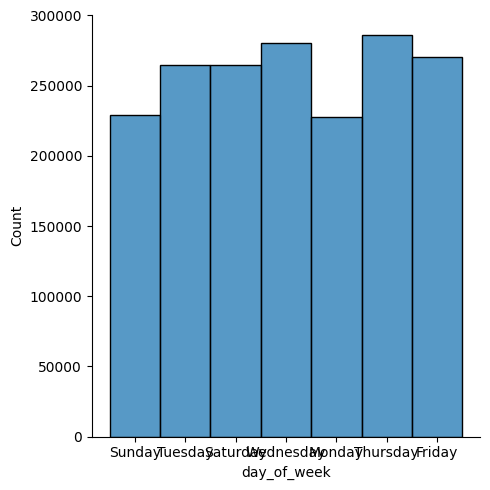

In [109]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
sns.displot(x = 'day_of_week',data=df,discrete=True)


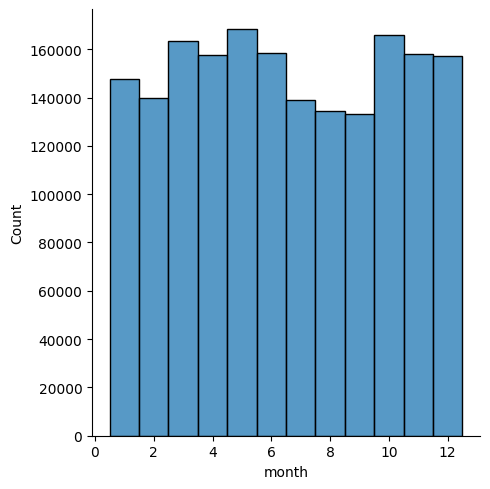

In [110]:
# Show the monthly trends in pickups
df['month'] = df['tpep_pickup_datetime'].dt.month
sns.displot(x = 'month',data=df,discrete=True)

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [111]:
# Analyse the above parameters
li = ['fare_amount','tip_amount','total_amount','trip_distance']

for i in li:
    print("Column>>",i)
    print("0s",df[df[i]==0][i].count(),' | -ves',df[df[i]<0][i].count())
    
# negative values we had already removed

Column>> fare_amount
0s 576  | -ves 0
Column>> tip_amount
0s 405444  | -ves 0
Column>> total_amount
0s 252  | -ves 76
Column>> trip_distance
0s 15243  | -ves 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [112]:
# Create a df with non zero entries for the selected parameters.
df1 = df.drop(df[(df.total_amount==0) | (df.tip_amount==0) | (df.fare_amount==0) | (df.trip_distance==0)].index)


In [113]:
#remove all 0's values
li = ['fare_amount','tip_amount','total_amount','trip_distance']

for i in li:
    print("Column>>",i)
    print("0s",df1[df1[i]==0][i].count(),' | -ves',df1[df1[i]<0][i].count())

Column>> fare_amount
0s 0  | -ves 0
Column>> tip_amount
0s 0  | -ves 0
Column>> total_amount
0s 0  | -ves 0
Column>> trip_distance
0s 0  | -ves 0


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='month', ylabel='revenue'>

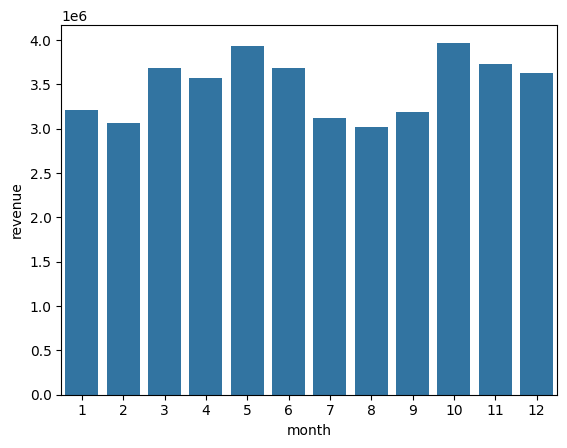

In [117]:
# Group data by month and analyse monthly revenue
monthly_revenue = df1.groupby('month').agg(revenue=('total_amount','sum'))
sns.barplot(x='month',y='revenue',data=monthly_revenue)

In [118]:
monthly_revenue['month'] = monthly_revenue.index
monthly_revenue['qtr'] = monthly_revenue['month'].apply(lambda x:(x-1)//3+1)

<Axes: xlabel='qtr', ylabel='revenue'>

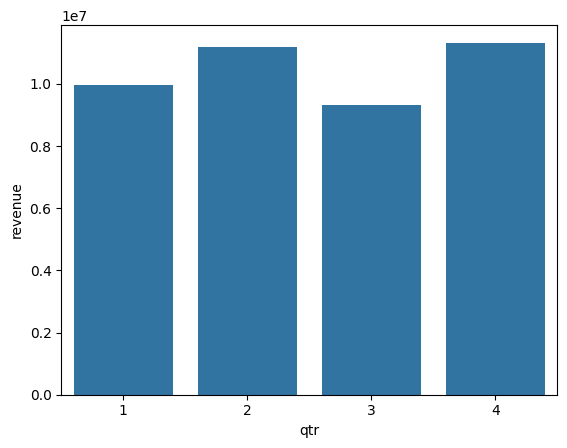

In [119]:
sns.barplot(x='qtr',y='revenue',data=monthly_revenue.groupby('qtr').agg(revenue=('revenue','sum')))

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [120]:
# Calculate proportion of each quarter
monthly_revenue.groupby('qtr').agg(revenue=('revenue','sum'))


revenue
qtr             
1     9961450.47
2    11172758.68
3     9314041.97
4    11325453.43

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

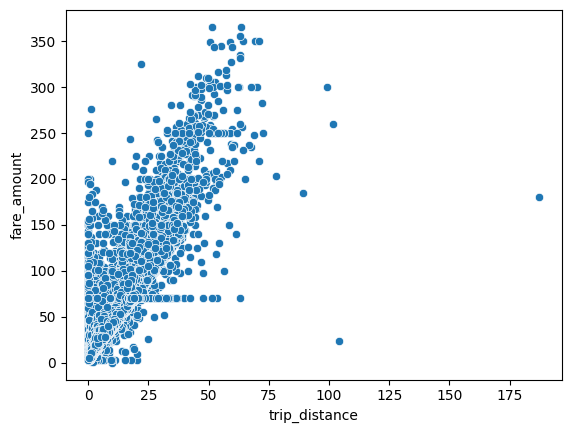

In [121]:
# Show how trip fare is affected by distance
sns.scatterplot(x = 'trip_distance',y= 'fare_amount',data=df1)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [122]:
# Show relationship between fare and trip duration
#creating new column time_duration and removing rows having negative time_duration
df1['time_duration'] = (df1['tpep_dropoff_datetime']-df1['tpep_pickup_datetime']).dt.total_seconds()/3600.0
df1 = df1[df1['time_duration']>=0]

<Axes: xlabel='time_duration', ylabel='fare_amount'>

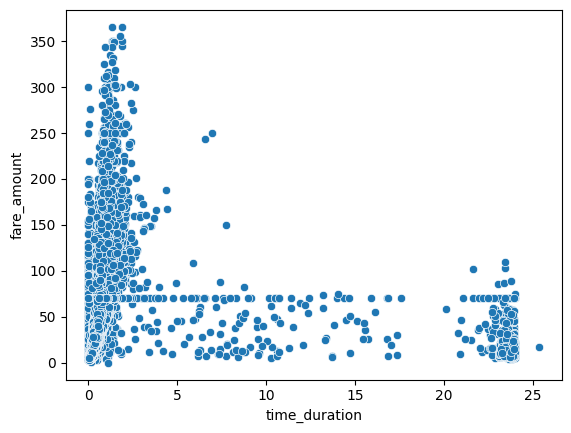

In [123]:
sns.scatterplot(x = 'time_duration',y= 'fare_amount',data=df1)

<Axes: xlabel='passenger_count', ylabel='avgAmount'>

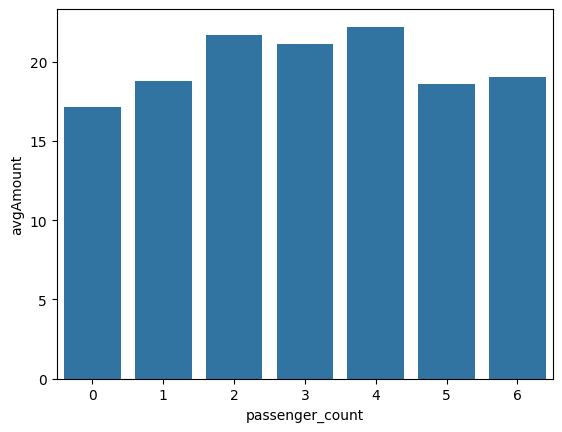

In [124]:
# Show relationship between fare and number of passengers
passenger_fare_rel = df1.groupby('passenger_count').agg(avgAmount=('fare_amount','mean'))
sns.barplot(x='passenger_count',y='avgAmount',data=passenger_fare_rel)


<Axes: xlabel='trip_distance', ylabel='tip_amount'>

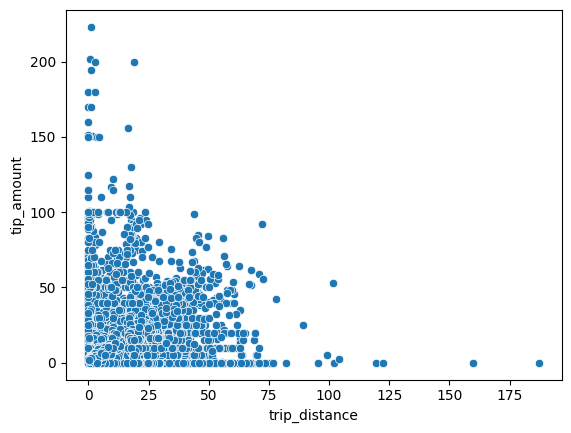

In [125]:
# Show relationship between tip and trip distance
sns.scatterplot(x = 'trip_distance',y='tip_amount',data=df)


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [126]:
# Analyse the distribution of different payment types (payment_type).
#sns.histplot(x = 'payment_type', data=df1)
df1.payment_type.value_counts()


payment_type
1412810.0    1
23.0         1
Name: count, dtype: int64

In [127]:
df['payment_type']=pd.to_numeric(df1['payment_type'], downcast='integer').value_counts()

<Axes: xlabel='payment_type', ylabel='count'>

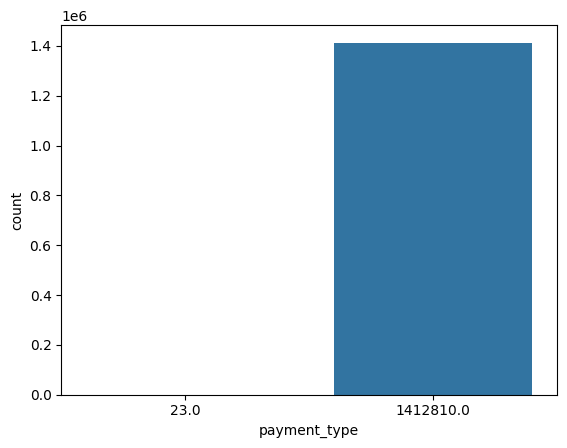

In [128]:
tempSeries = df1.groupby('payment_type').agg(count=('payment_type','sum'))
sns.barplot(x='payment_type',y='count',data=tempSeries)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [129]:
# !pip install geopandas
import geopandas as gpd

In [130]:
os.chdir('../taxi_zones')
os.listdir()

['taxi_zones.dbf',
 'taxi_zones.prj',
 'taxi_zones.sbn',
 'taxi_zones.sbx',
 'taxi_zones.shp',
 'taxi_zones.shp.xml',
 'taxi_zones.shx']

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [131]:
# import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

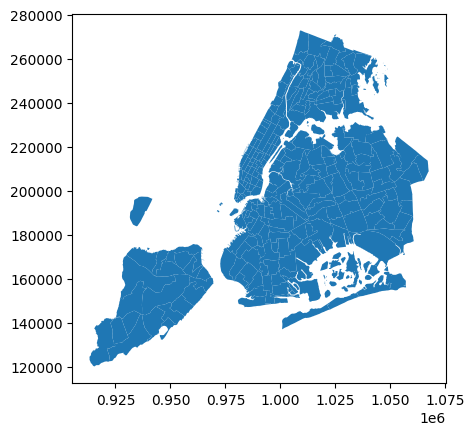

In [132]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [133]:
# Merge zones and trip records using locationID and PULocationID
df1 = df1.merge( zones, left_on="PULocationID",right_on='LocationID', how="left")


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [134]:
# Group data by location and calculate the number of trips
df1.groupby('LocationID').agg(totalTrips=('LocationID','count'))


totalTrips
LocationID            
1.0                 33
2.0                  2
4.0               1402
6.0                  1
7.0                253
...                ...
258.0                2
260.0               97
261.0             6947
262.0            19338
263.0            27884

[224 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [135]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge( df1.groupby('LocationID').agg(totalTrips=('LocationID','count')), left_on="LocationID",right_on='LocationID', how="left")


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

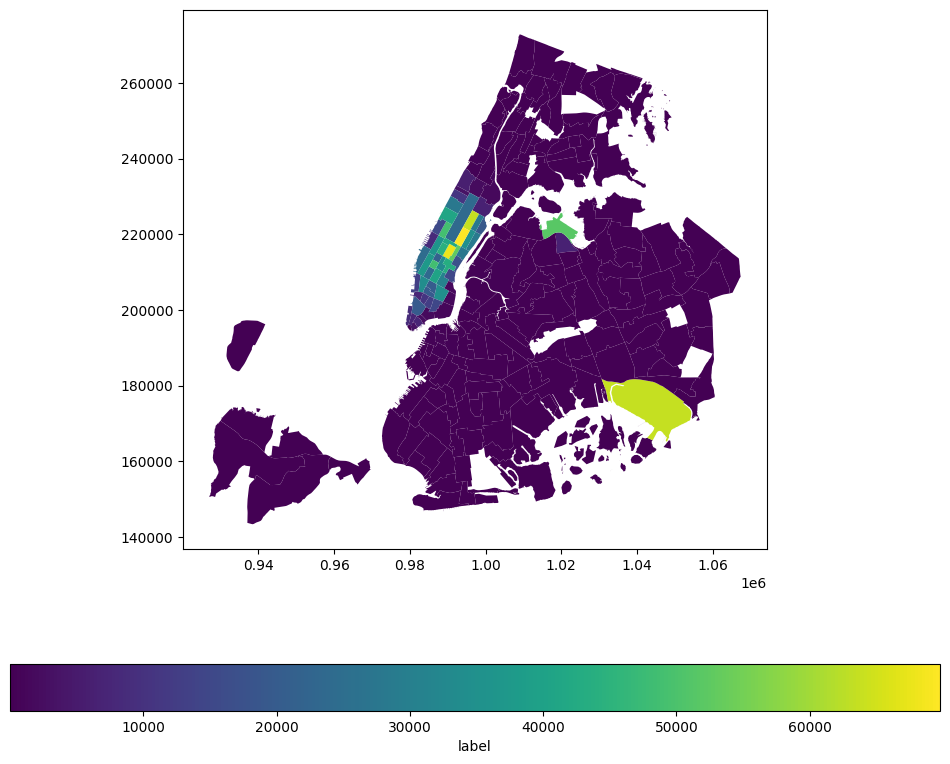

In [136]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(column='totalTrips',ax = ax, legend=True,legend_kwds = {'label': "label", 'orientation': "horizontal"})

In [137]:
# Define figure and axis


# Plot the map and display it



In [138]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by="totalTrips",ascending=False)


OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
131       132    0.245479    0.002038               JFK Airport         132   
161       162    0.035270    0.000048              Midtown East         162   
..        ...         ...         ...                       ...         ...   
209       210    0.114852    0.000453            Sheepshead Bay         210   
213       214    0.135300    0.000812  South Beach/Dongan Hills         214   
220       221    0.166218    0.000890                 Stapleton         221   
244       245    0.095983    0.000466             West Brighton         245   
258       259    0.126750    0.000395        Woodlawn/Wakefield         259   

           borough                                           geometry  \
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
209       Brooklyn  POLYGON ((1004356.905 156081.405, 1004653.331 ...   
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   
220  Staten Island  POLYGON ((963349.728 171627.581, 963397.759 17...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   

     totalTrips  
236     69772.0  
160     67703.0  
235     63674.0  
131     63562.0  
161     52708.0  
..          ...  
209         NaN  
213         NaN  
220         NaN  
244         NaN  
258         NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [139]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

<Axes: xlabel='pickup_hours', ylabel='count'>

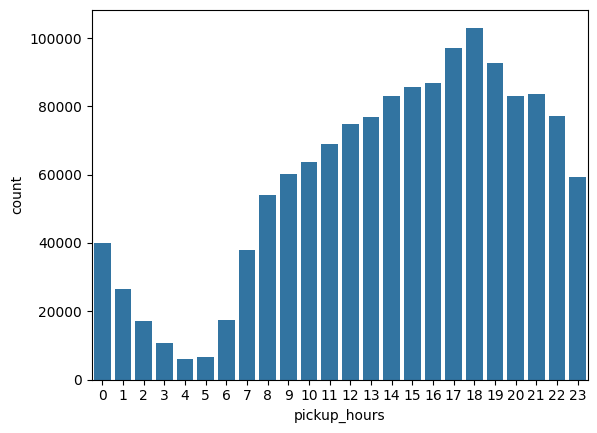

In [140]:
# Visualise the number of trips per hour and find the busiest hour
trip_per_hour = df1.groupby('pickup_hours').agg(count=('pickup_hours','count'))
sns.barplot(x='pickup_hours',y='count',data=trip_per_hour)
#18th hour is the busiest hour(18:00-19:00)

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [141]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Axes: xlabel='pickup_hours', ylabel='count'>

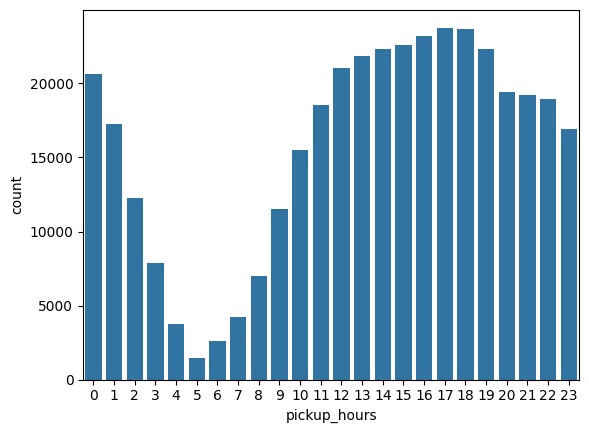

In [142]:
# Compare traffic trends for the week days and weekends
trip_per_hour = df1[df1['day_of_week'].isin(['Sunday','Saturday'])].groupby('pickup_hours').agg(count=('pickup_hours','count'))
sns.barplot(x='pickup_hours',y='count',data=trip_per_hour)


<Axes: xlabel='pickup_hours', ylabel='count'>

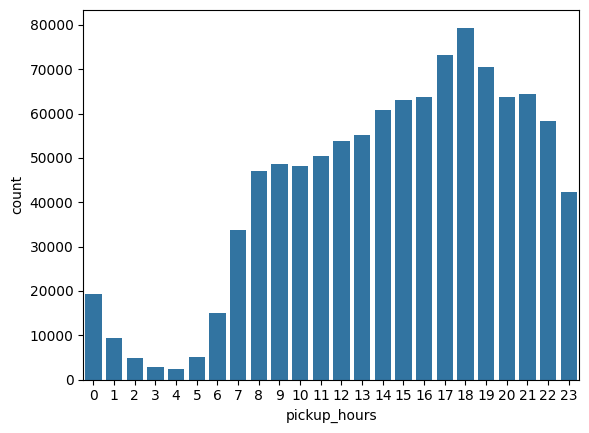

In [143]:
trip_per_hour = df1[df1['day_of_week'].isin(['Sunday','Saturday'])==False].groupby('pickup_hours').agg(count=('pickup_hours','count'))
sns.barplot(x='pickup_hours',y='count',data=trip_per_hour)


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [144]:
# Find top 10 pickup and dropoff zones
pickup_10 = df1.groupby('PULocationID').agg(count=('PULocationID','count')).sort_values('count',ascending=False).head(10)
dropoff_10 = df1.groupby('DOLocationID').agg(count=('DOLocationID','count')).sort_values('count',ascending=False).head(10)
pickup_10['PULocationID'] = pickup_10.index
dropoff_10['DOLocationID'] = dropoff_10.index

In [145]:
dropoff_10.reset_index(drop=True, inplace=True)
pickup_10.reset_index(drop=True, inplace=True)
pickup_10 = pickup_10.merge( zones[['zone','LocationID']], left_on="PULocationID",right_on='LocationID', how="left")
dropoff_10 = dropoff_10.merge( zones[['zone','LocationID']], left_on="DOLocationID",right_on='LocationID', how="left")

In [146]:
#top 10 pickup zones
pickup_10['zone']

0           Upper East Side South
1                  Midtown Center
2           Upper East Side North
3                     JFK Airport
4                    Midtown East
5               LaGuardia Airport
6             Lincoln Square East
7    Penn Station/Madison Sq West
8       Times Sq/Theatre District
9                     Murray Hill
Name: zone, dtype: object

In [147]:
#top10 dropoff
dropoff_10['zone']

0        Upper East Side North
1        Upper East Side South
2               Midtown Center
3                  Murray Hill
4        Upper West Side South
5          Lincoln Square East
6                 Midtown East
7              Lenox Hill West
8    Times Sq/Theatre District
9                 East Chelsea
Name: zone, dtype: object

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [148]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
top_pu = df1.groupby('PULocationID').agg(count=('PULocationID','count')).sort_values('count',ascending=False)['count'].head(10).sum()
bottom_pu = df1.groupby('PULocationID').agg(count=('PULocationID','count')).sort_values('count',ascending=True)['count'].head(10).sum()


top_do = df1.groupby('DOLocationID').agg(count=('DOLocationID','count')).sort_values('count',ascending=False)['count'].head(10).sum()
bottom_do = df1.groupby('DOLocationID').agg(count=('DOLocationID','count')).sort_values('count',ascending=True)['count'].head(10).sum()

print("Top 10 Ratio",top_pu/top_do)
print("Bottom Ratio:",bottom_pu/bottom_do)


Top 10 Ratio 1.1806729046047235
Bottom Ratio: 0.19230769230769232


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [149]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df1 = df1[df1['pickup_hours'].isin([23,0,1,2,3,4])]
night_df1 = night_df1[(night_df1['PULocationID']!=0) & (night_df1['DOLocationID']!=0)]
pickup_10_night = night_df1.groupby('PULocationID').agg(count=('PULocationID','count')).sort_values('count',ascending=False).head(10)
dropoff_10_night = night_df1.groupby('DOLocationID').agg(count=('DOLocationID','count')).sort_values('count',ascending=False).head(10)
pickup_10_night['PULocationID'] = pickup_10_night.index
dropoff_10_night['DOLocationID'] = dropoff_10_night.index
dropoff_10_night.reset_index(drop=True, inplace=True)
pickup_10_night.reset_index(drop=True, inplace=True)
pickup_10_night = pickup_10_night.merge( zones[['zone','LocationID']], left_on="PULocationID",right_on='LocationID', how="left")
dropoff_10_night = dropoff_10_night.merge( zones[['zone','LocationID']], left_on="DOLocationID",right_on='LocationID', how="left")

In [150]:
pickup_10_night['zone']

0                    East Village
1                    West Village
2                     JFK Airport
3                 Lower East Side
4                    Clinton East
5         Greenwich Village South
6       Times Sq/Theatre District
7    Penn Station/Madison Sq West
8               LaGuardia Airport
9                   Midtown South
Name: zone, dtype: object

In [151]:
dropoff_10_night['zone']

0                     East Village
1                     Clinton East
2                      Murray Hill
3                         Gramercy
4                  Lenox Hill West
5                     East Chelsea
6                   Yorkville West
7                     West Village
8            Upper West Side South
9    Sutton Place/Turtle Bay North
Name: zone, dtype: object

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [152]:
# Filter for night hours (11 PM to 5 AM)
night_df1 = df1[df1['pickup_hours'].isin([23,0,1,2,3,4])]
night_df1 = night_df1[(night_df1['PULocationID']!=0) & (night_df1['DOLocationID']!=0)]

In [153]:
df1['time_of_day'] = np.where(df1['pickup_hours'].isin([23,0,1,2,3,4]), 'Night', 'Day')

In [154]:
df1.time_of_day.value_counts()

time_of_day
Day      1252914
Night     159974
Name: count, dtype: int64

<Axes: xlabel='time_of_day', ylabel='revenue'>

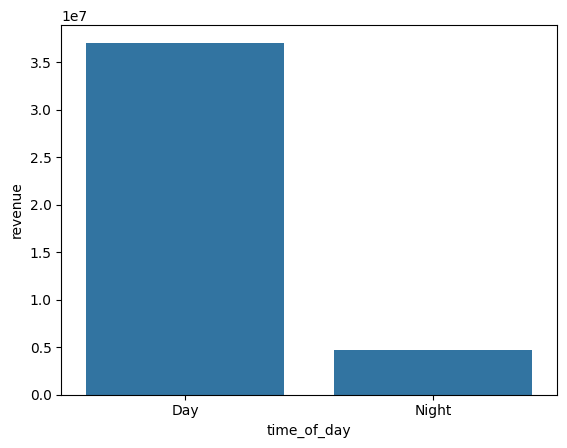

In [155]:
d = df1.groupby('time_of_day').agg(revenue = ('total_amount','sum'))
sns.barplot(x = 'time_of_day',y='revenue',data = d)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [165]:
# Analyse the fare per mile per passenger for different passenger counts
df1 = df1[df1['passenger_count']!=0]
df1['fare_perMileperPassenger']=((df1['fare_amount']/df1['trip_distance'])/df1['passenger_count'])
df1['fare_perMileperPassenger'].value_counts()


fare_perMileperPassenger
10.000000    6272
8.000000     5188
9.000000     4099
9.285714     3430
8.125000     3219
             ... 
5.317848        1
1.272321        1
2.385276        1
3.754613        1
1.773356        1
Name: count, Length: 98632, dtype: int64

In [166]:
d = df1.groupby('passenger_count').agg(revenue = ('fare_perMileperPassenger','mean'))

In [167]:
d

revenue
passenger_count          
1                9.271793
2                5.002319
3                3.378220
4                4.022211
5                1.590611
6                1.285262

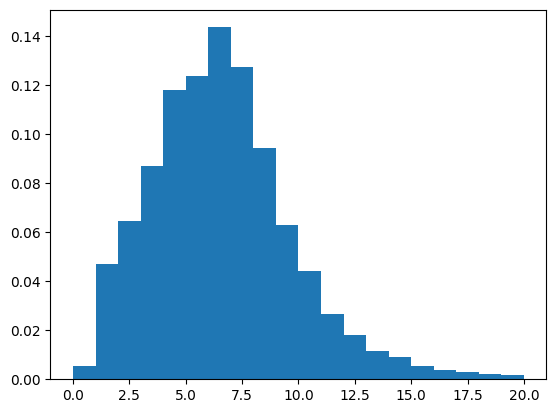

In [168]:
plt.hist(df1['fare_perMileperPassenger'],bins=20,density=True,range=[0,20])
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

averageFareperMile
day_of_week                    
Friday                 8.029251
Monday                 7.953239
Saturday               7.554833
Sunday                 8.473574
Thursday               8.396092
Tuesday                8.307614
Wednesday              8.276098

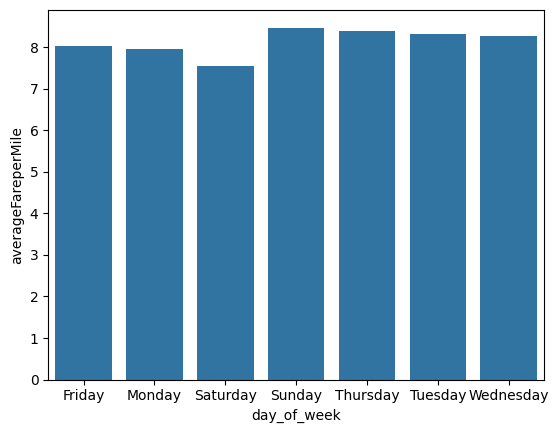

In [169]:
# Compare the average fare per mile for different days and for different times of the day
#analysis by days of week
d = df1.groupby('day_of_week').agg(averageFareperMile = ('fare_perMileperPassenger','mean'))
sns.barplot(x = 'day_of_week',y='averageFareperMile',data = d)
d

In [162]:
df1.day_of_week.value_counts()

day_of_week
Thursday     224966
Wednesday    221011
Friday       207867
Tuesday      206946
Saturday     203189
Sunday       174829
Monday       174080
Name: count, dtype: int64

<Axes: xlabel='pickup_hours', ylabel='averageFareperMile'>

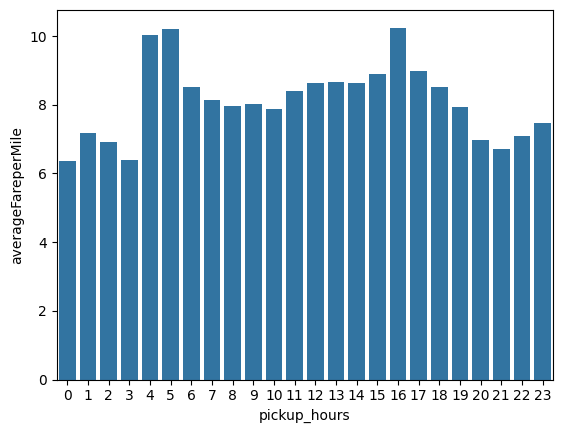

In [170]:
# analysis by hour of the day
d = df1.groupby('pickup_hours').agg(averageFareperMile = ('fare_perMileperPassenger','mean'))
sns.barplot(x = 'pickup_hours',y='averageFareperMile',data = d)

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<Axes: xlabel='VendorID', ylabel='averageFareperMile'>

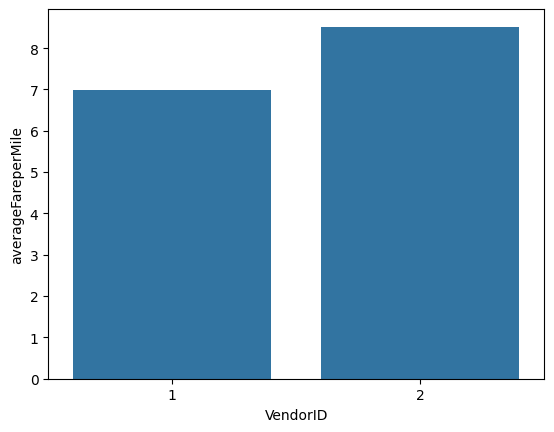

In [172]:
# Compare fare per mile for different vendors
d = df1.groupby('VendorID').agg(averageFareperMile = ('fare_perMileperPassenger','mean'))
sns.barplot(x = 'VendorID',y='averageFareperMile',data = d)


In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391249 entries, 0 to 1412887
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   VendorID                  1391249 non-null  int64         
 1   tpep_pickup_datetime      1391249 non-null  datetime64[us]
 2   tpep_dropoff_datetime     1391249 non-null  datetime64[us]
 3   passenger_count           1391249 non-null  int32         
 4   trip_distance             1391249 non-null  float64       
 5   RatecodeID                1391249 non-null  int32         
 6   store_and_fwd_flag        1391249 non-null  object        
 7   PULocationID              1391249 non-null  int64         
 8   DOLocationID              1391249 non-null  int64         
 9   payment_type              2 non-null        float64       
 10  fare_amount               1391249 non-null  float64       
 11  extra                     1391249 non-null  float64    

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [174]:
# Defining distance tiers
average_fare_each_vendor_per_mile =  df1[df1['trip_distance']<=2].groupby('VendorID').agg(averageFare_upto2 = ('fare_perMileperPassenger','mean'))
average_fare_each_vendor_per_mile['2_to_5'] = df1[(df1['trip_distance']>2) & (df1['trip_distance']<=5)].groupby('VendorID').agg(averageFare_upto2 = ('fare_perMileperPassenger','mean'))
average_fare_each_vendor_per_mile['greater_than_5']=  df1[df1['trip_distance']>5].groupby('VendorID').agg(averageFare_upto2 = ('fare_perMileperPassenger','mean'))
average_fare_each_vendor_per_mile['VendorID']=average_fare_each_vendor_per_mile.index
average_fare_each_vendor_per_mile

averageFare_upto2    2_to_5  greater_than_5  VendorID
VendorID                                                       
1                  8.439218  5.567276        3.879054         1
2                 11.528845  5.650085        3.802683         2

<Axes: xlabel='VendorID'>

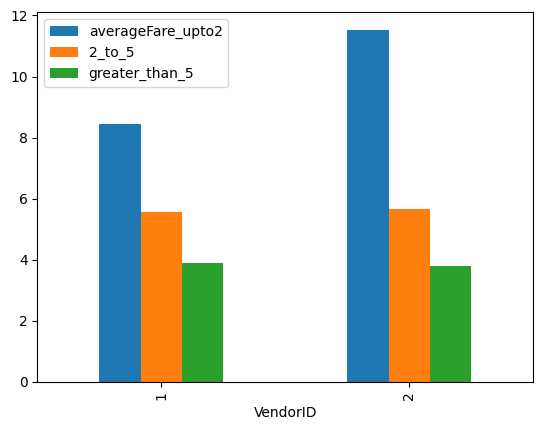

In [175]:
average_fare_each_vendor_per_mile.plot(x = 'VendorID',y = ['averageFare_upto2','2_to_5','greater_than_5'],kind='bar')

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [176]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df1['tip_percent']=(df1['tip_amount']/df1['total_amount'])*100


avgTip
passenger_count           
1                15.403255
2                15.424382
3                15.409433
4                15.568850
5                15.430215
6                15.518630

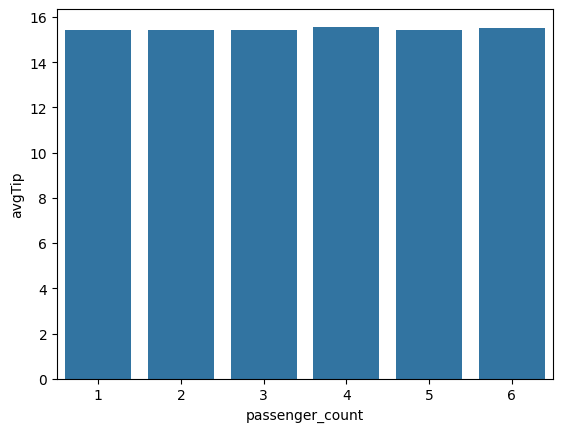

In [182]:
#tip based on passenger count
da = df1.groupby('passenger_count').agg(avgTip=('tip_percent','mean'))
sns.barplot(x='passenger_count',y='avgTip',data=da)
da

<Axes: xlabel='trip_distance', ylabel='avgTip'>

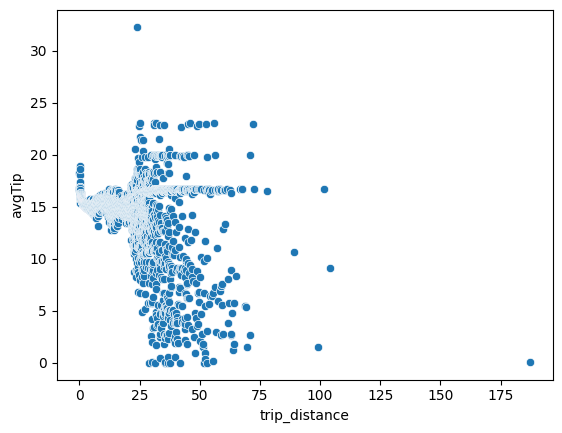

In [178]:
#tip based on distance
da = df1.groupby('trip_distance').agg(avgTip=('tip_percent','mean'))
sns.scatterplot(x='trip_distance',y='avgTip',data=da)

<Axes: xlabel='pickup_hours', ylabel='avgTip'>

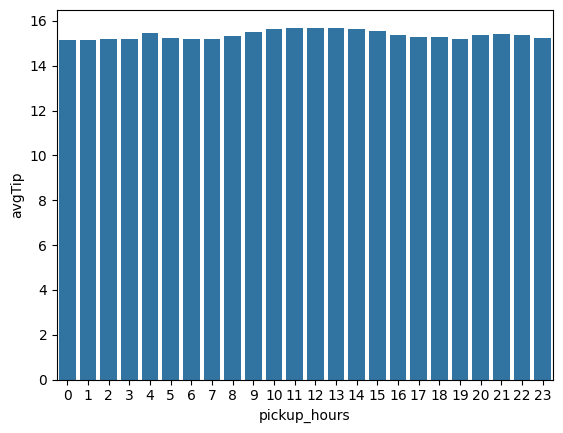

In [128]:
#tip by pickup time
da = df1.groupby('pickup_hours').agg(avgTip=('tip_percent','mean'))
sns.barplot(x='pickup_hours',y='avgTip',data=da)

<Axes: xlabel='passenger_count', ylabel='avgTip'>

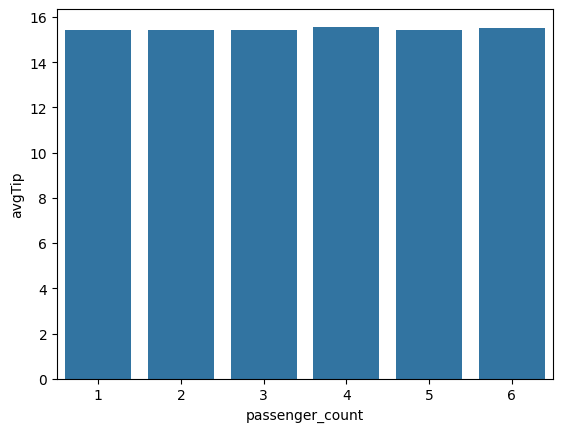

In [129]:
#tip by no of passengers
da = df1.groupby('passenger_count').agg(avgTip=('tip_percent','mean'))
sns.barplot(x='passenger_count',y='avgTip',data=da)

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

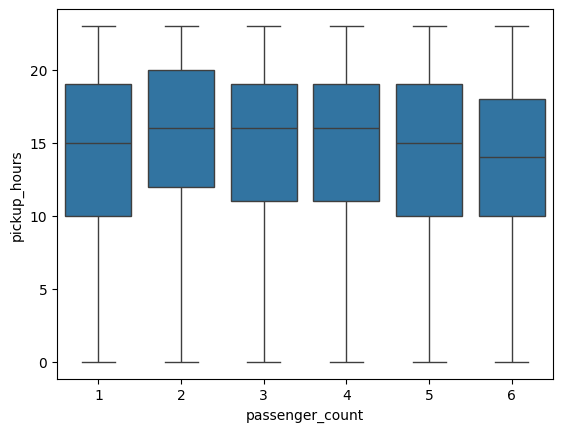

In [131]:
# See how passenger count varies across hours and days

sns.boxplot(x = df1['passenger_count'],y = df1.pickup_hours)
plt.show()



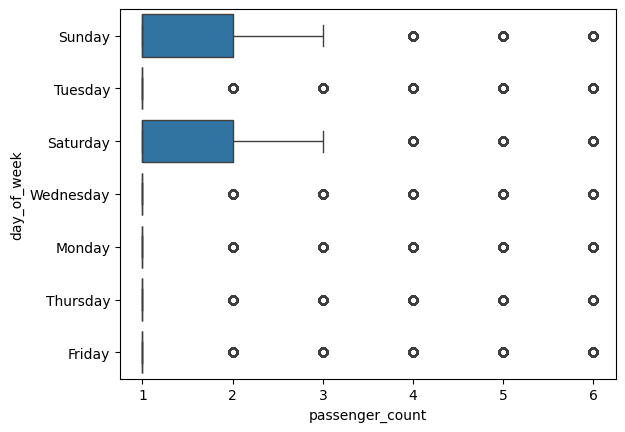

In [132]:

sns.boxplot(x = df1['passenger_count'],y = df1.day_of_week)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [141]:
# How does passenger count vary across zones

zones = zones.merge( df1.groupby('LocationID').agg(passenger_count=('passenger_count','sum')), left_on="LocationID",right_on='LocationID', how="left")
zones['passenger_count']

0         45.0
1          2.0
2          NaN
3       2024.0
4          NaN
        ...   
258        NaN
259      136.0
260    10379.0
261    25803.0
262    37384.0
Name: passenger_count, Length: 263, dtype: float64

In [142]:
zones['passenger_count'].describe()

count      225.000000
mean      8533.626667
std      19439.821770
min          1.000000
25%          4.000000
50%         34.000000
75%       2005.000000
max      93847.000000
Name: passenger_count, dtype: float64

<Axes: >

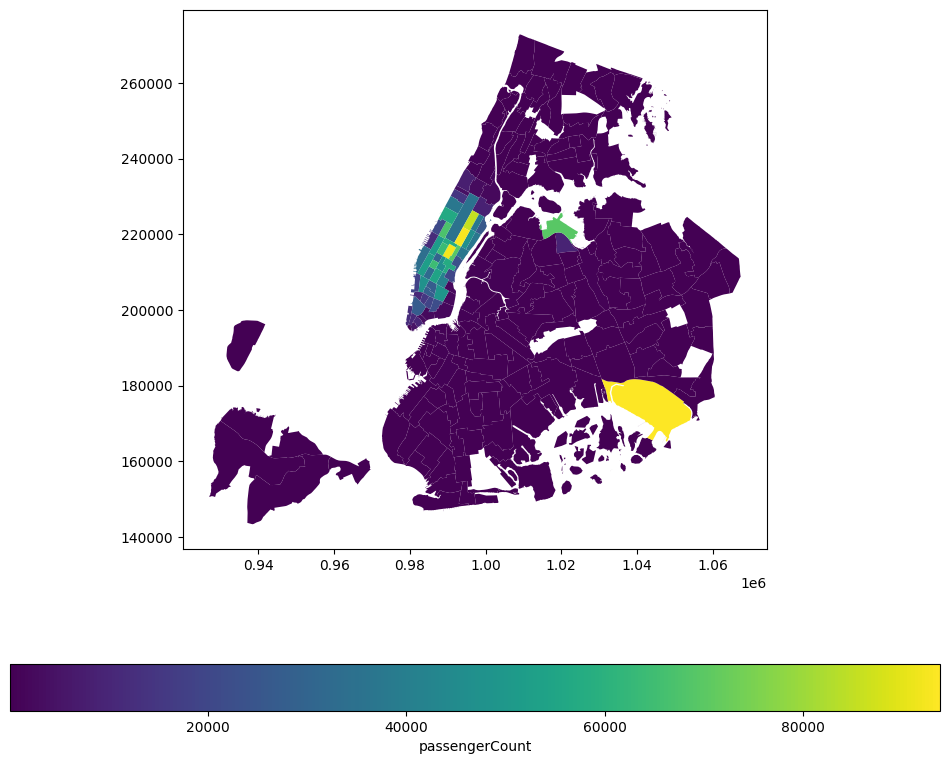

In [139]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones.plot(column='passenger_count',ax = ax, legend=True,legend_kwds = {'label': "passengerCount", 'orientation': "horizontal"})

In [144]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones = zones.merge( df1.groupby('LocationID').agg(passenger_count_average=('passenger_count','mean')), left_on="LocationID",right_on='LocationID', how="left")
zones['passenger_count_average']


0      1.363636
1      1.000000
2           NaN
3      1.443652
4           NaN
         ...   
258         NaN
259    1.402062
260    1.494026
261    1.334316
262    1.340697
Name: passenger_count_average, Length: 263, dtype: float64

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [155]:
# How often is each surcharge applied?
((df1[(df1.improvement_surcharge>0)].shape[0])/(df1.shape[0]))*100


99.9985136826132

In [191]:
d = df1[df1.improvement_surcharge==0].groupby('zone').agg(improvement_surchargeCount = ('zone','count')).sort_values(by='improvement_surchargeCount',ascending=False)
d = d.merge(df1.groupby('zone').agg(totalCount = ('zone','count')),left_on="zone",right_on='zone', how="left")
d

improvement_surchargeCount  totalCount
zone                                                                
JFK Airport                                            8       62987
Battery Park City                                      1        8578
Central Park                                           1       23424
Clinton East                                           1       35890
East Village                                           1       34235
LaGuardia Airport                                      1       51144
Lenox Hill West                                        1       34245
Midtown Center                                         1       66623
Murray Hill                                            1       42540
Penn Station/Madison Sq West                           1       47726

In [189]:
df1.groupby('zone').agg(totalCount = ('zone','count'))

totalCount
zone                               
Alphabet City                  1378
Arrochar/Fort Wadsworth           1
Astoria                         251
Astoria Park                      2
Auburndale                        3
...                             ...
Woodhaven                         2
Woodside                         97
World Trade Center             6870
Yorkville East                19048
Yorkville West                27450

[224 rows x 1 columns]

In [156]:
((df1[(df1.congestion_surcharge>0)].shape[0])/(df1.shape[0]))*100

94.94383135818268

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#Cabs should be positioned in top pickup zones. 
#There should be more available cabs during 6pm to 12pm on weekdays. 
#On weekends more cabs should be available during nigh hours.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Vendor 1 can increase fare in some areas to maximize the revenue.